Training Model for throughput prediction according to signal strength metrics. - Regression problem

x --> {RSRP, RSRQ, RSSINR}

y --> throughput

GOAL: After applying model, add a throughput column for each cell nb.
       
       for ex: in database.py -- def write_throughput()

1. Read data (whole dataset or only non-anomalous)
2. PREPROCESS: Clean and scale parameters.
    - Drop correlated parameters? : rsrp 
                with rsrp: 0.959
                without:
    - Data scaling:
        - Scale also y? *no*
        - Which scale to use 
                *Normalizer* 
                scaler = MinMaxScaler(feature_range=(0, 1)
3. Apply and compare models.
    - Linear Regression --- 0.959
    - Random Forest ---- 0.99
    - Neural Network

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import r2_score
from processing import PREPROCESS
import joblib

In [18]:
#db = DUMMY()
#db.read_data(meas='liveUE o train')  - valid.csv entero
# db.data = db.data.loc[db.data["Anomaly"]==0]
#ps = PREPROCESS(db.data) --> scale, correlation??
#ps.process()
#df = ps.data
#Obtain x and y
# check linearity (plot graphics)
# split train and test sets (0.75/0.25)

In [2]:
dataset = pd.read_csv("valid.csv")
# aqui decido si filtrar por anomalos o no
# dataset = dataset.loc[dataset["Anomaly"]==0]
dataset = dataset.loc[dataset["Anomaly"]==0]

In [3]:
dataset

,du-id,measTimeStampRf,nrCellIdentity,prb_usage,targetTput,throughput,ue-id,x,y,rsrp,...,rsrp_nb2,rsrq_nb2,rssinr_nb2,rsrp_nb3,rsrq_nb3,rssinr_nb3,rsrp_nb4,rsrq_nb4,rssinr_nb4,Anomaly
0,1013,2021-06-25T11:42:33.695,c13/N77,77.0,0.30,0.300000,Train passenger 2,2271.000000,-1009.000000,-89.510710,...,-97.302999,-10.805760,24.925788,-97.708621,-10.807123,24.520166,-100.277910,-10.819438,21.950877,0
1,1002,2021-06-25T11:42:33.695,c2/N77,58.0,0.10,0.100000,Waiting passenger 3,-1010.000000,-1024.000000,-117.737803,...,-122.571159,-40.796509,9.657629,-123.144658,-40.797172,9.084130,-125.617011,-40.801278,6.611776,0
2,1003,2021-06-25T11:42:33.725,c3/N77,56.0,0.10,0.100000,Waiting passenger 9,-594.000000,-981.000000,-117.220982,...,-122.373051,-40.796300,9.855736,-124.919480,-40.799875,7.309308,-125.100190,-40.800217,7.128598,0
3,1003,2021-06-25T11:42:33.735,c3/B13,45.0,0.10,0.076249,Waiting passenger 1,-512.000000,-913.000000,-118.229717,...,-124.104227,-40.798496,8.124561,-125.374472,-40.800764,6.854315,-126.131552,-40.802467,6.097236,0
4,1009,2021-06-25T11:42:33.735,c9/N77,59.0,0.10,0.100000,Waiting passenger 5,-1485.000000,-855.000000,-118.082389,...,-122.555110,-40.796492,9.673677,-122.737839,-40.796693,9.490948,-125.961597,-40.802058,6.267191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1009,2021-06-25T11:43:06.815,c9/N77,59.0,0.10,0.100000,Waiting passenger 5,-1485.000000,-855.000000,-118.082389,...,-122.555110,-40.796492,9.673677,-122.737839,-40.796693,9.490948,-125.961597,-40.802058,6.267191,0
9995,1009,2021-06-25T11:43:06.815,c9/B13,45.0,0.10,0.065244,Waiting passenger 4,-1421.000000,-964.000000,-120.379828,...,-123.423297,-40.797527,8.805490,-125.683383,-40.801423,6.545405,-126.254338,-40.802772,5.974450,0
9997,1006,2021-06-25T11:43:06.815,c6/B13,62.0,0.25,0.250000,Pedestrian-2,-244.783848,752.821813,-88.449863,...,-91.578136,-10.795550,30.650652,-93.705199,-10.797910,28.523589,-96.521281,-10.803466,25.707506,0
9998,1013,2021-06-25T11:43:06.815,c13/B13,45.0,0.30,0.186928,Train passenger 3,2035.800000,-1001.000000,-87.495078,...,-97.904156,-10.807827,24.324632,-98.496055,-10.810161,23.732733,-101.611713,-10.829327,20.617075,0


In [3]:
ps = PREPROCESS(dataset) #drop correlated columns?
ps.process()
df = ps.data
df

,prb_usage,rsrp,rsrq,rssinr
0,0.626034,-0.727750,-0.087760,0.266008
1,0.419670,-0.851915,-0.295168,0.104852
2,0.408791,-0.855694,-0.297784,0.109555
3,0.336691,-0.884596,-0.305218,0.104741
4,0.424816,-0.850225,-0.293724,0.101858
...,...,...,...,...
7427,0.424816,-0.850225,-0.293724,0.101858
7428,0.332460,-0.889365,-0.301391,0.087540
7429,0.545354,-0.778007,-0.094941,0.297120
7430,0.428994,-0.834107,-0.102894,0.331123


In [4]:
x = df

In [5]:
y = dataset[['throughput']]
y

,throughput
0,0.300000
1,0.100000
2,0.100000
3,0.076249
4,0.100000
...,...
9994,0.100000
9995,0.065244
9997,0.250000
9998,0.186928


**Linearity between features and label?**

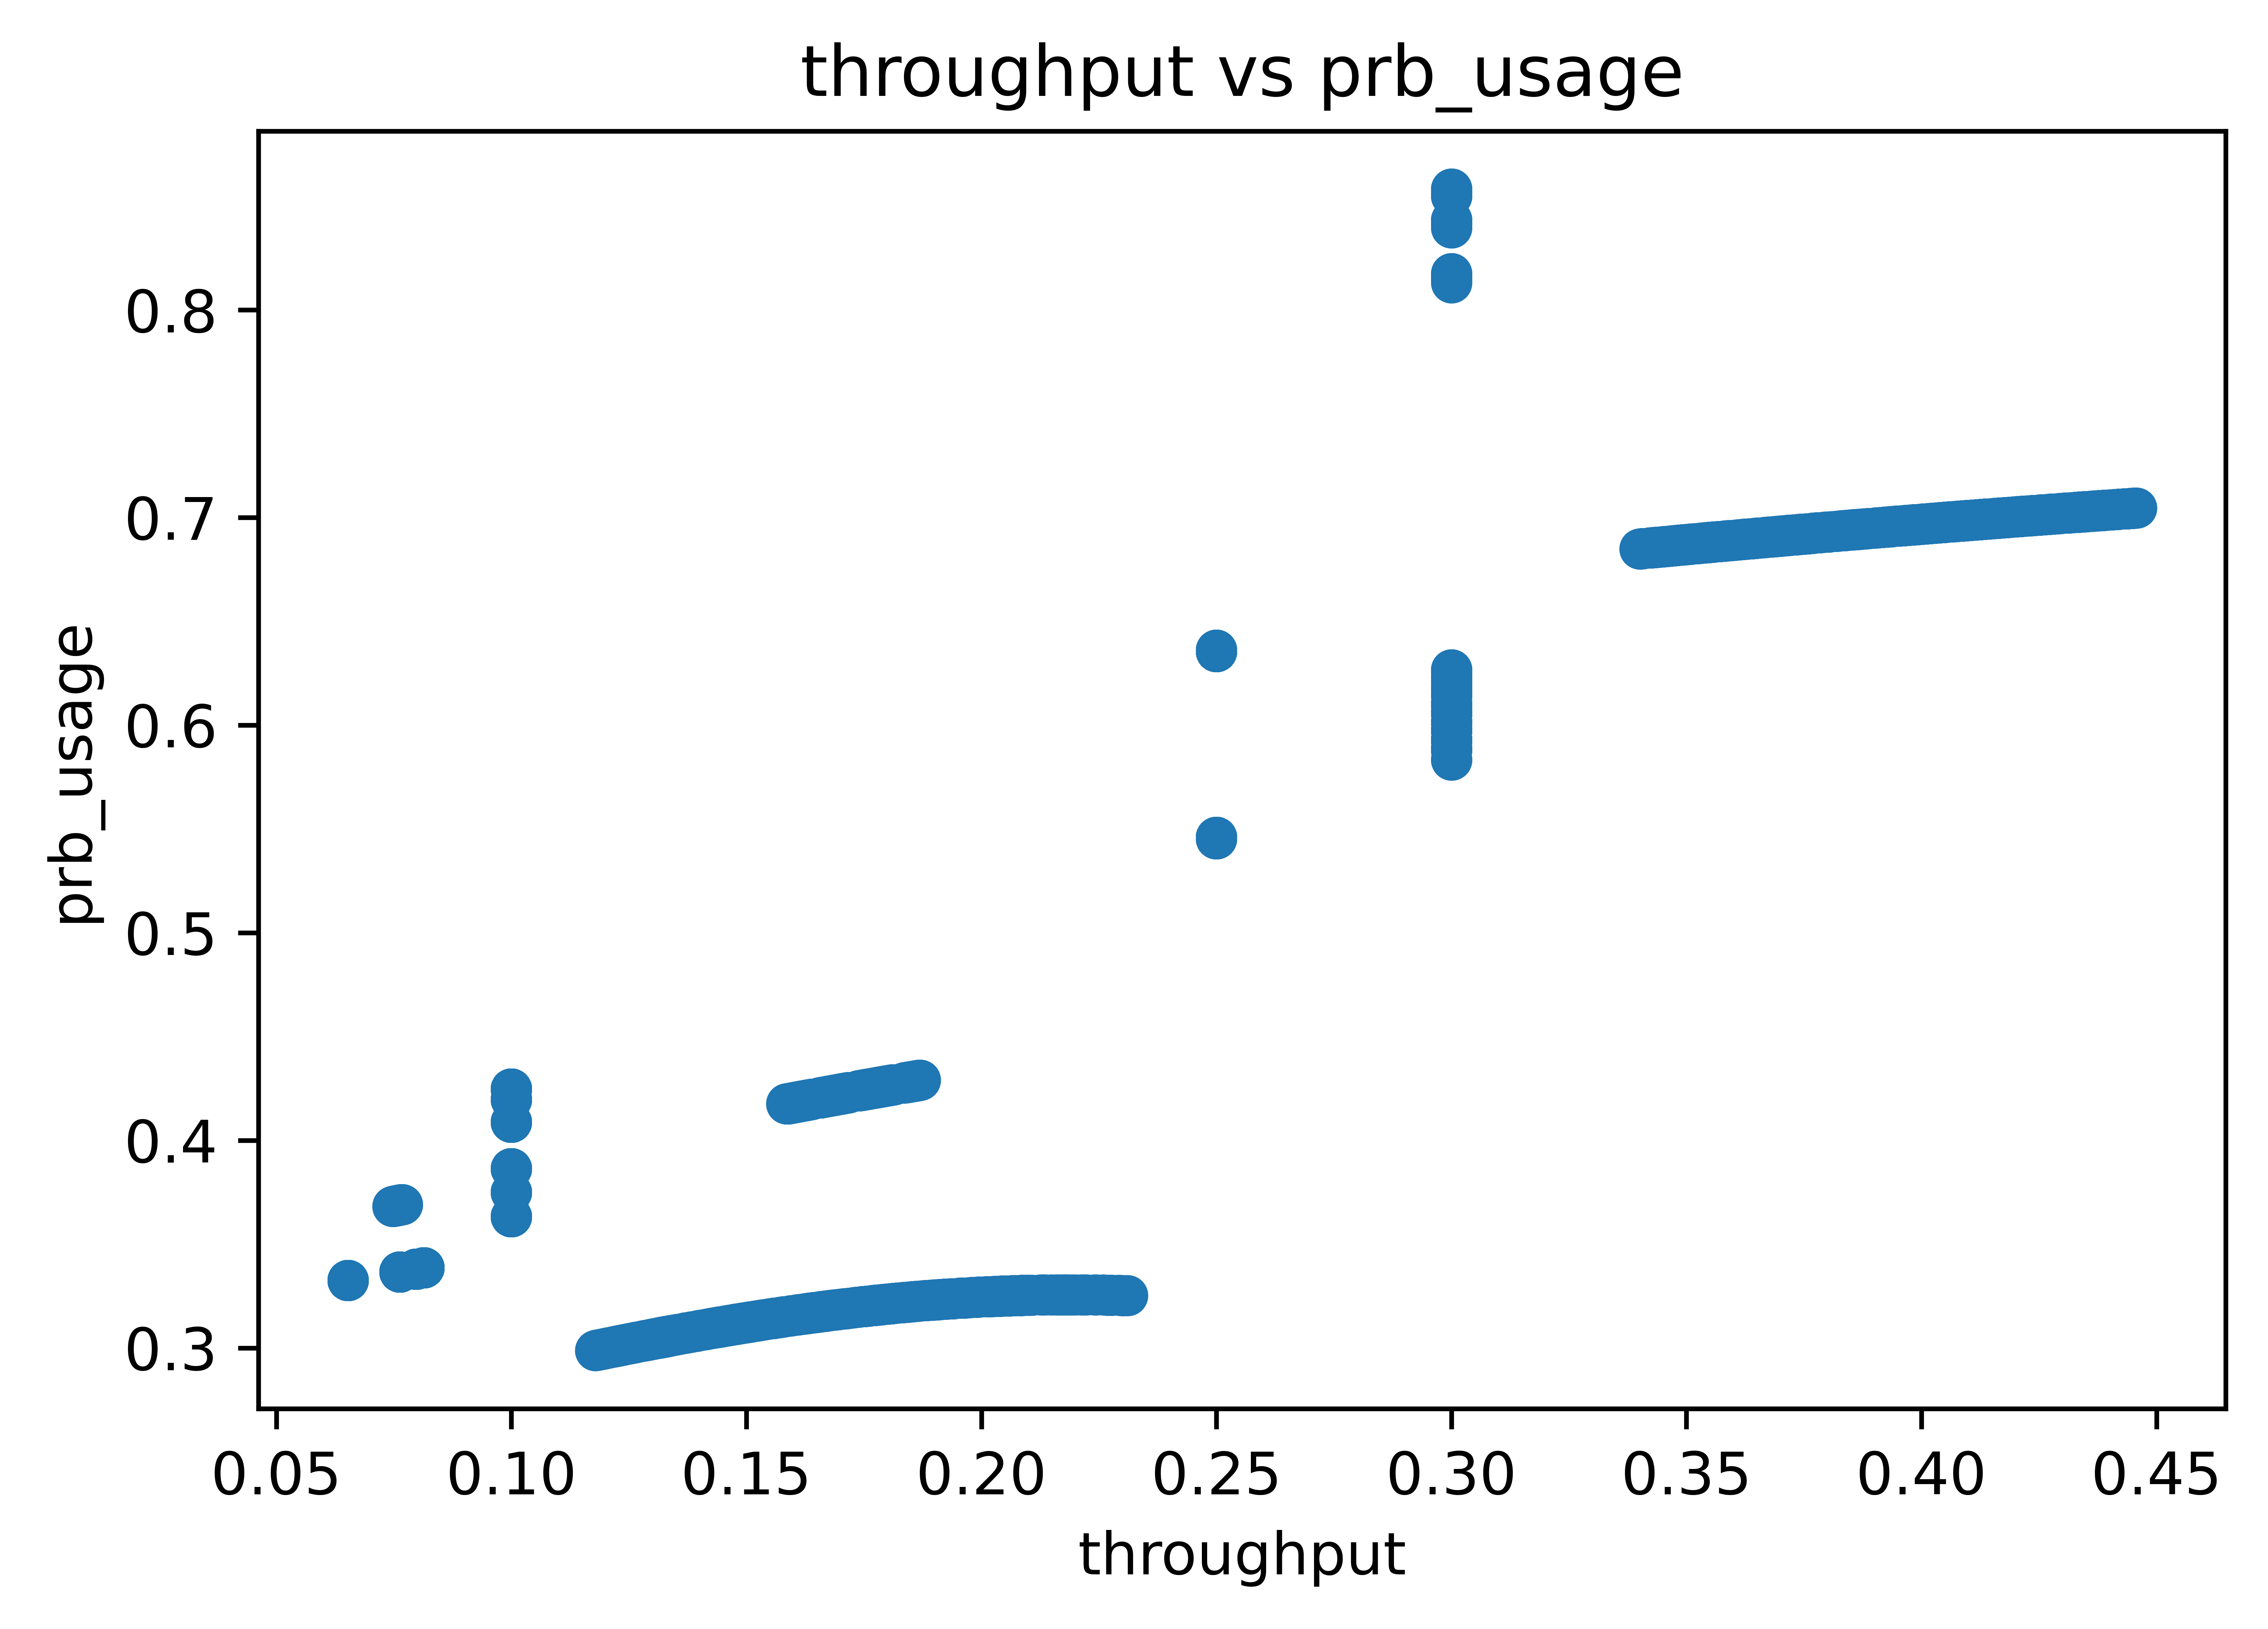

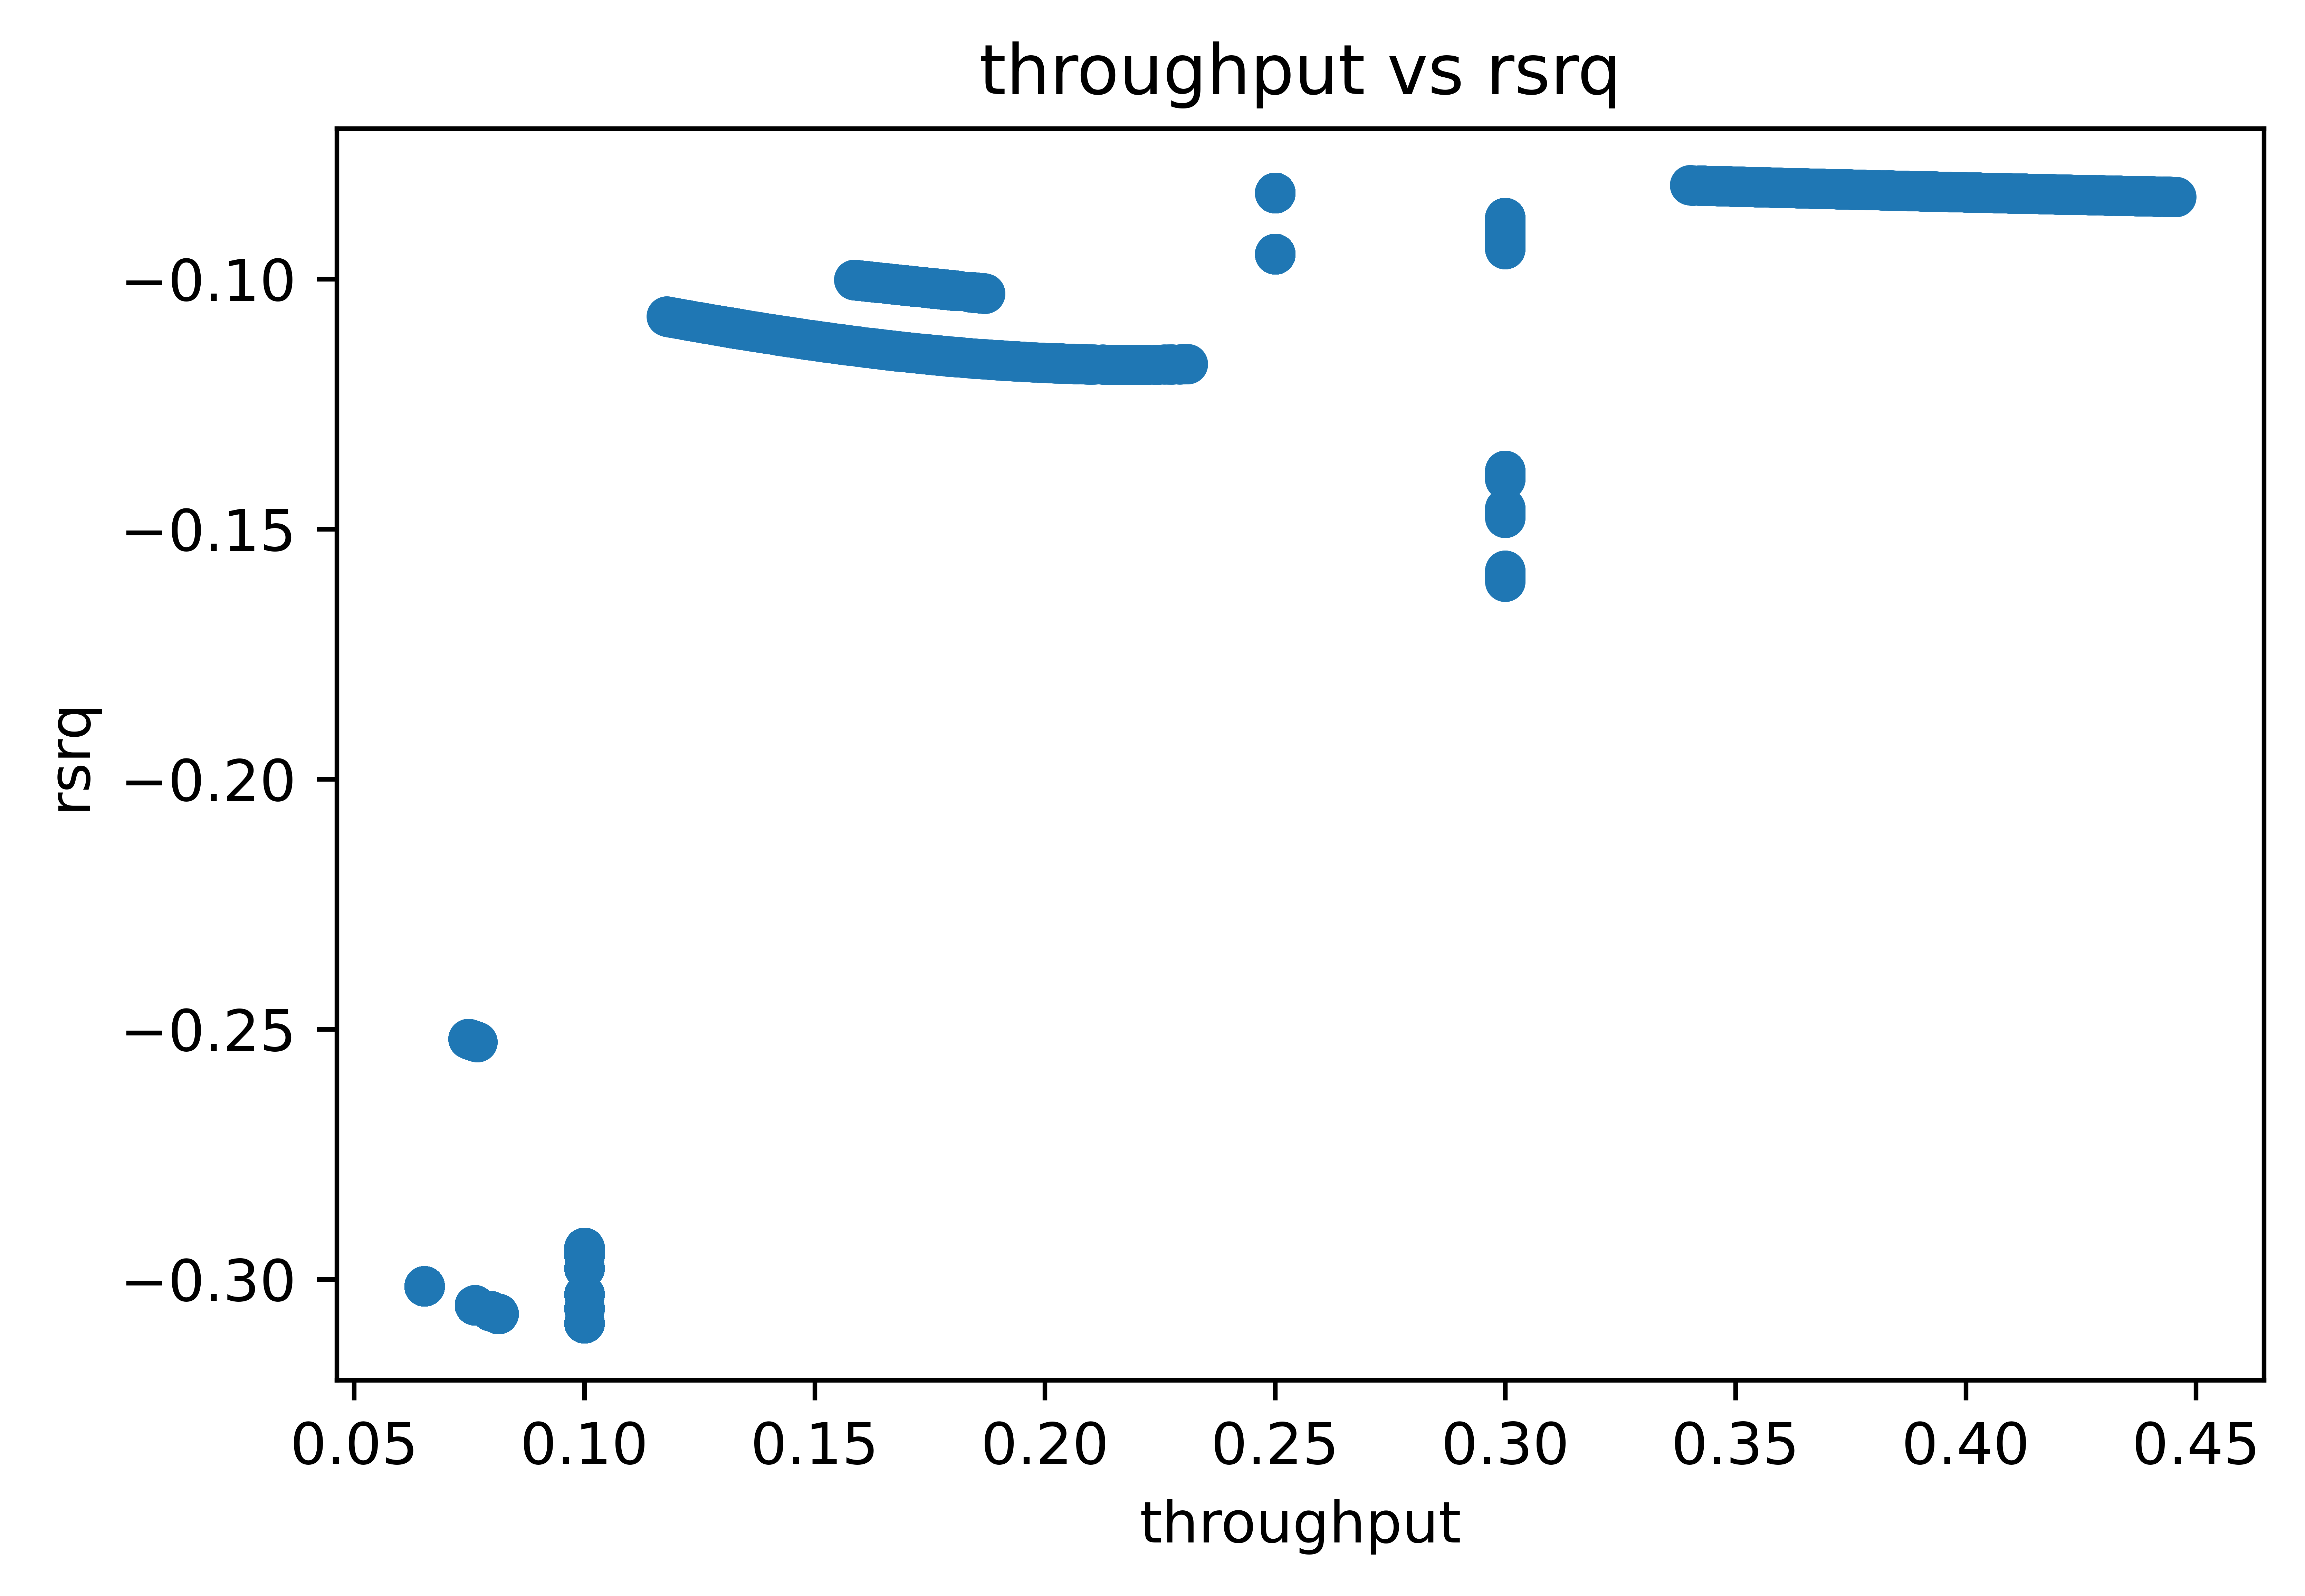

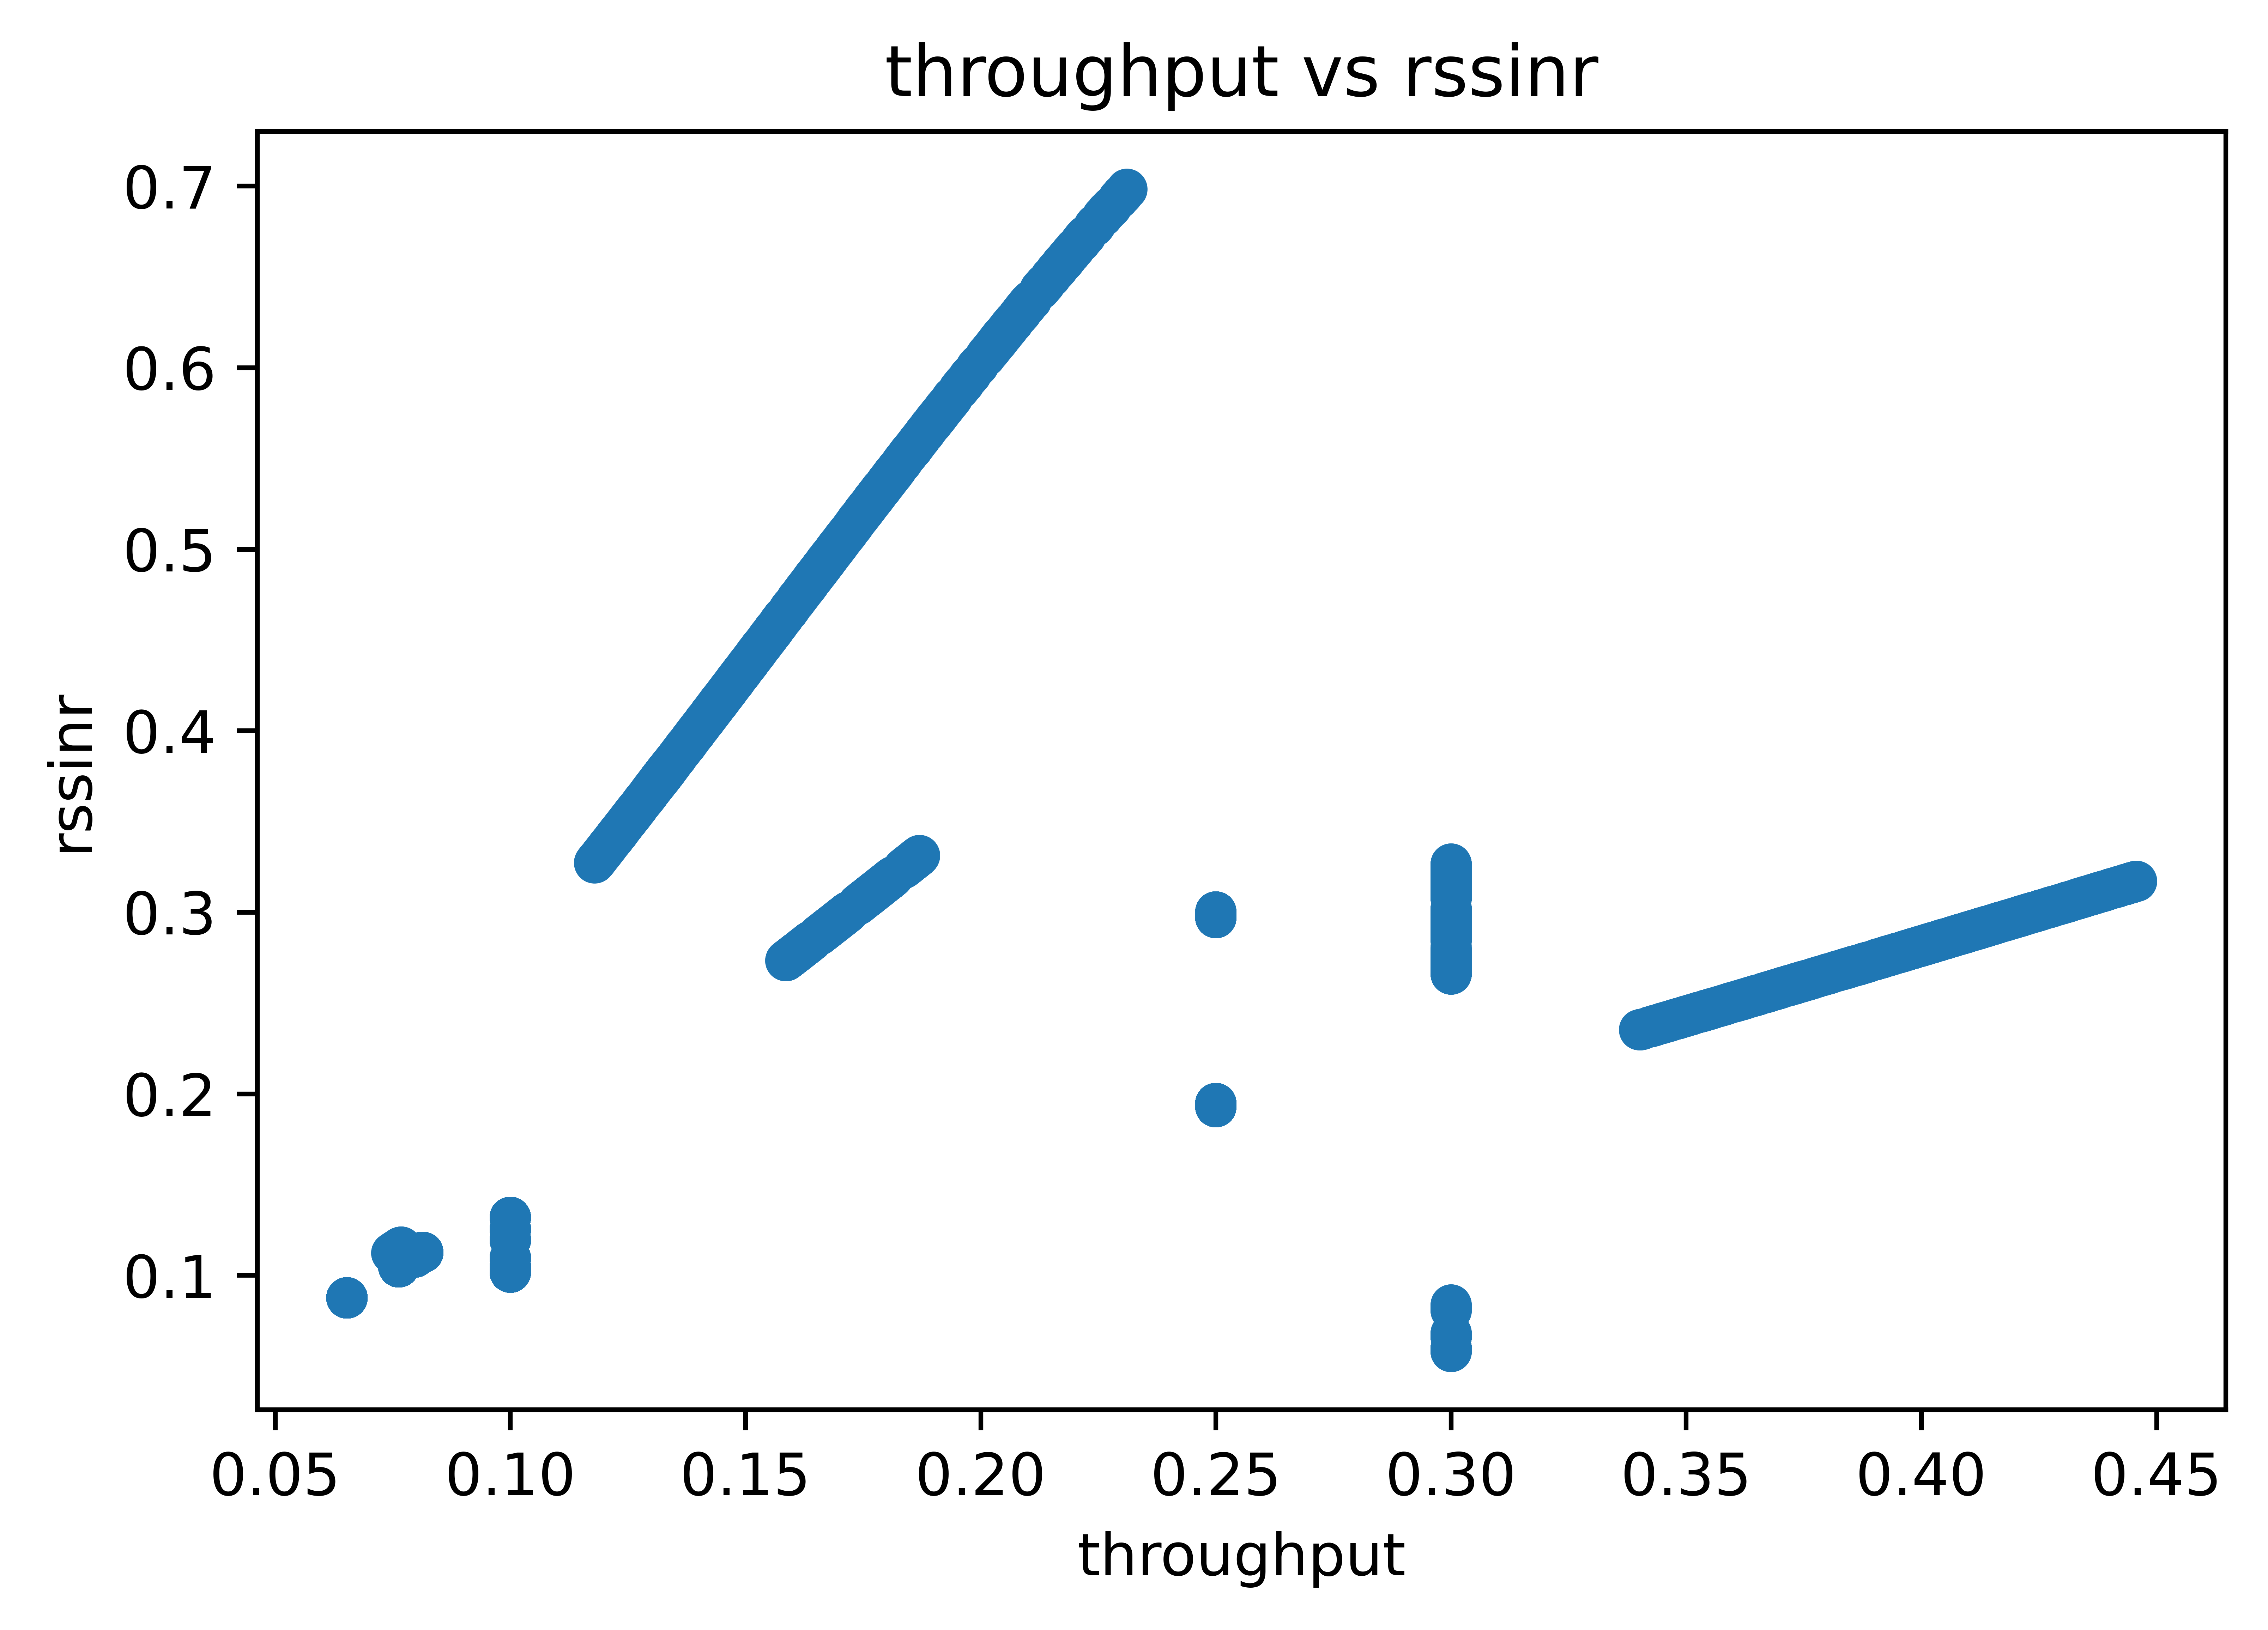

In [6]:
features = ['prb_usage', 'rsrq', 'rssinr']
for feature_name in features:
    plt.figure(dpi=1200)
    plt.title(f"throughput vs {feature_name}")
    plt.scatter(y, x[[feature_name]])
    plt.xlabel('throughput')
    plt.ylabel(feature_name)
    plt.savefig(f"{feature_name}.png")
    plt.show()

We can see that the data is non-linear, which means that a linear regression will probably not yield the best results. But we can do it anyway and see how good it performs.

**Train/Test split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

**Linear Regression**

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.score(X_train,y_train)  #r2

0.6051937865397983

In [22]:
predictions = model.predict(X_test)
predictions

array([[0.10378994],
       [0.23003438],
       [0.10625927],
       ...,
       [0.05880878],
       [0.24864816],
       [0.1793969 ]])

In [23]:
print(y_test)

      throughput
6252    0.022850
4684    0.250000
1731    0.100000
4742    0.148574
4521    0.348041
...          ...
4862    0.100000
7025    0.026406
7647    0.065244
7161    0.076832
73      0.158703

[2500 rows x 1 columns]


In [24]:
# importing r2_score module

# predicting the accuracy score
score=r2_score(y_test,predictions)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predictions))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predictions)))

r2 socre is  0.6095544421219288
mean_sqrd_error is== 0.00425241362342773
root_mean_squared error of is== 0.06521053307118206


**RF REGRESSOR**

In [8]:
model = RandomForestRegressor(max_depth=9)
model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=9)

In [10]:
X_train

,prb_usage,rsrq,rssinr
4901,0.806991,-0.557966,0.193492
4375,0.719335,-0.652088,0.239455
6698,0.615998,-0.221610,0.755934
9805,0.948913,-0.123523,0.290354
1101,0.913479,-0.108336,0.392197
...,...,...,...
5734,0.531624,-0.191241,0.825108
5191,0.801386,-0.563642,0.200222
5390,0.789962,-0.575448,0.211707
860,0.801386,-0.563642,0.200222


In [9]:
predictions = model.predict(X_test)

In [22]:
print(predictions
y_test

,throughput
625,0.120634
9009,0.100000
101,0.444308
4885,0.100000
2018,0.100000
...,...
6779,0.300000
2266,0.300000
6628,0.081345
655,0.250000


In [15]:
# predicting the accuracy score
score=r2_score(y_test,predictions)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predictions))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predictions)))

r2 socre is  0.9999919057576411
mean_sqrd_error is== 8.000965307364593e-08
root_mean_squared error of is== 0.0002828597763444741


In [23]:
def write_throughput(model):
    dataset = pd.read_csv('valid.csv')
    for i in range(5):
        nb = dataset[['prb_usage', f"rsrp_nb{i}", f"rsrq_nb{i}", f"rssinr_nb{i}"]]
        print(nb)
        sc = joblib.load('scale')
        nb = sc.transform(nb)
        throughput = model.predict(nb)
        print(throughput)
        dataset[f"tput_nb{i}"] = throughput
        dataset.to_csv("valid_tput.csv", index=False)
    
write_throughput(model)

      prb_usage    rsrp_nb0   rsrq_nb0  rssinr_nb0
0          77.0  -91.515408 -10.795496   30.713379
1          58.0 -119.742502 -40.794262   12.486286
2          56.0 -117.497904 -40.793273   14.730884
3          45.0 -116.225019 -40.792902   16.003769
4          59.0 -120.087087 -40.794464   12.141700
...         ...         ...        ...         ...
9995       45.0 -118.375130 -40.793600   13.853658
9996       91.0 -116.813648 -40.793060   15.415139
9997       62.0  -94.324372 -10.798843   27.904415
9998       45.0  -93.369588 -10.797456   28.859200
9999       50.0 -117.507820 -40.793277   14.720967

[10000 rows x 4 columns]
[0.3        0.1        0.1        ... 0.25       0.16034844 0.1       ]
      prb_usage    rsrp_nb1   rsrq_nb1  rssinr_nb1
0          77.0  -97.389918 -10.806042   24.838869
1          58.0 -119.956042 -40.794385   12.272745
2          56.0 -119.225680 -40.793987   13.003108
3          45.0 -119.363985 -40.794057   12.864802
4          59.0 -120.859427 -40.794

**ARTIFICIAL NEURAL NETWORK REGRESSION**

In [8]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#from xgboost import XGBRegressor

In [9]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,377
Trainable params: 165,377
Non-trainable params: 0
_________________________________________________________________


In [13]:
NN_model.fit(X_train,y_train, epochs=500, batch_size=32, validation_split = 0.25, callbacks=callbacks_list)

Epoch 1/500
131/131 [==============================] - 2s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - val_loss: 0.0279 - val_mean_absolute_error: 0.0279

Epoch 00001: val_loss improved from inf to 0.02794, saving model to Weights-001--0.02794.hdf5
Epoch 2/500
131/131 [==============================] - 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - val_loss: 0.0178 - val_mean_absolute_error: 0.0178

Epoch 00002: val_loss improved from 0.02794 to 0.01777, saving model to Weights-002--0.01777.hdf5
Epoch 3/500
131/131 [==============================] - 1s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196

Epoch 00003: val_loss did not improve from 0.01777
Epoch 4/500
131/131 [==============================] - 1s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - val_loss: 0.0207 - val_mean_absolute_error: 0.0207

Epoch 00004: val_loss did not improve from 0.01777
Epoch 5/500
131/131 [=====================

In [15]:

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [1]:
#------------------------------------------------------------

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [20]:
dataset = pd.read_csv("valid.csv")

In [112]:
ps = PREPROCESS(dataset)
ps.process()
df = ps.data
df

,prb_usage,throughput,rsrq,rssinr,Anomaly
0,0.912789,0.003556,-0.127958,0.387853,0.000000
1,0.801385,0.001382,-0.563641,0.200222,0.000000
2,0.789961,0.001411,-0.575447,0.211707,0.000000
3,0.721958,0.001223,-0.654471,0.224594,0.000000
4,0.806991,0.001368,-0.557965,0.193492,0.000000
...,...,...,...,...,...
9995,0.727169,0.001054,-0.659214,0.191471,0.000000
9996,0.904321,0.001471,-0.405392,0.133267,0.009938
9997,0.868039,0.003500,-0.151118,0.472926,0.000000
9998,0.777718,0.003231,-0.186536,0.600290,0.000000


In [21]:
x = dataset[[ "rsrp", "rsrq", "rssinr"]]
y = dataset[[ "throughput" ]]

In [14]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [28]:
# Storing the fit object for later reference
PredictorScalerFit=scaler.fit(x)
TargetVarScalerFit=scaler.fit(y)

In [29]:
# Generating the standardized values of X and y
x=PredictorScalerFit.transform(x)
y=TargetVarScalerFit.transform(y)

ValueError: X has 3 features, but MinMaxScaler is expecting 1 features as input.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [12]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 50, verbose=1)

Epoch 1/50
372/372 [==============================] - 1s 1ms/step - loss: 0.0115
Epoch 2/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 3/50
372/372 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 4/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 5/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6/50
372/372 [==============================] - 1s 1ms/step - loss: 0.0013- ETA: 0s - loss: 
Epoch 7/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10/50
372/372 [==============================] - 0s 1ms/step - loss: 9.2609e-04
Epoch 11/50
372/372 [==============================] - 0s 1ms/step - loss: 8.5605e-04
Epoch 12/50
372/372 [==============================] - 1s 1ms/step - loss: 8.0395

In [11]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: throughput    89.03637
dtype: float64
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: throughput    45.176508
dtype: float64
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: throughput    92.302754
dtype: float64
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: throughput    92.362432
dtype: float64
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: throughput    88.827068
dtype: float64
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: throughput    90.218295
dtype: float64
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: throughput    87.500288
dtype: float64
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: throughput    87.934866
dtype: float64
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: throughput    87.72532
dtype: float64
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: throughput    45.948154
dtype: float64
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: throughput    94.8516
dtype: float64
12 Par

In [13]:
predic = model.predict(X_test)
# predicting the accuracy score
score=r2_score(y_test,predic)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predic))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predic)))

r2 socre is  0.9133390668919626
mean_sqrd_error is== 0.0008566226319337033
root_mean_squared error of is== 0.02926811630313272


In [20]:
from tensorflow import keras
""" 
 Artificial Neural Network with
 Sequential class from keras.

 Model: 4 Dense layers + 2 Dropout Layers

Parameters - Layers' units
----------
1st Dense layer - Num of columns in the dataset = 4 

default: 32 - 128 - 0.3 - 256 - 0.3 -  1
"""
model = keras.Sequential(
    [ keras.layers.Dense(16, activation="relu",    input_shape=(X_train.shape[-1],)),
     keras.layers.Dense(32, activation="relu"),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(64, activation="relu"),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(1, activation="sigmoid"),]
)
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-2),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=50,
    verbose=2,
    validation_split=0.25)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                64        
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
____________________________________________________

In [21]:
predic = model.predict(X_test)
# predicting the accuracy score
score=r2_score(y_test,predic)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predic))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predic)))

r2 socre is  0.9098086929574905
mean_sqrd_error is== 0.0008915195353363878
root_mean_squared error of is== 0.02985832438929532
